In [1]:
'''
tuning the covariance type 'full-matrix' 'diag-matrix'
'''

'''
convergence 1
'''
from process_bar import ShowProcess
from sklearn.mixture import GaussianMixture
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
#default

import pickle
import numpy as np
import time

#loadmat
from scipy.io import loadmat,savemat

'''
Import features
'''

save_path="D:\\LAB\\lab\\task_2_version_4\\features_10.txt"
#save_path="/Users/Mata/Documents/lab/task_2_version_3/features.txt"
f = open(save_path,'rb')
features=pickle.load(f)
f.close()

'''
Import UBM model
'''

#ubm_dataset=loadmat("/Users/Mata/Documents/2017/学习/ws2017:18/PUL/forStudents/ubm/UBM_GMMNaive_MFCC_Spectrum0to8000Hz.mat",mat_dtype=True)
ubm_dataset=loadmat("C:\\Users\\hasee\\workspace\\workspace\\lab\\patRecDat\\forStudents\\ubm\\UBM_GMMNaive_MFCC_Spectrum0to8000Hz.mat",mat_dtype=True)
ubm_means=ubm_dataset['means']
ubm_var = ubm_dataset['var']
ubm_weights = ubm_dataset['weights'].ravel()
ubm_var_set=[]
K_value=49
gamma_UBM=1

#transfer variance of UBM to cov
for k in range(K_value):
    ubm_var_set.append(np.diag(ubm_var[k]))
ubm_var_set=np.array(ubm_var_set)
ubm_var=ubm_var_set

num_people=len(features.keys())

'''
Start Crossvalidation
'''
#process_bar=ShowProcess(10)
detection_rate_set=[]
start=time.time()
error_set={}  
num_samples=len(features.keys())
name_set=list(features.keys())
confusion_matrix=np.zeros((num_samples,num_samples))
correct_sum=0
false_sum=0
scores_sum=0
for cross_num in range(10):
    #process_bar.show_process()
    train_file_set=[]
    test_file_set=[]
    correct_num=0
    false_num=0
    '''
    Split the test and train set
    '''
    for name in features.keys():
        whole_set=features.get(name,'no such file').copy()
        test_file=whole_set[cross_num]
        train_num=list(range(10))
        train_num.remove(cross_num)
        test_file_set.append(test_file)
        #name_set.append(name)
        train_set=[]
        for num in train_num:
            train_set.append(whole_set[num])
        train_set=np.concatenate(train_set,axis=1)
        train_file_set.append(train_set)
    '''
    Start modeling and identification
    '''
    print("crossvalidation "+str(cross_num+1)+" start")
    process_bar_2=ShowProcess(num_samples)
    scores_set=np.zeros((num_samples,num_samples))
    for index_2 in range(num_samples):
        process_bar_2.show_process()
        b_train=train_file_set[index_2]
        gmm=GaussianMixture(n_components=K_value,covariance_type='full',max_iter=1,weights_init=ubm_weights,\
                            means_init=ubm_means,precisions_init=np.linalg.inv(ubm_var))
        gmm.fit(b_train.T)
        for index_1 in range(num_samples):
            #print("now test set "+str(index_1)+" is testing "+str(index_2))
            b_test=np.array(test_file_set[index_1])
            scores_set[index_1,index_2]=gmm.score(b_test.T)

    '''
    Calculate the detection rate
    '''
    for index in range(num_samples):
        test_index=np.int(np.argwhere(scores_set[index,:]==max(scores_set[index,:])))
        if index == test_index:
            correct_num +=1
            correct_sum +=1
            confusion_matrix[index,index] +=1
        else:
            false_num +=1
            false_sum +=1
            confusion_matrix[index,test_index] +=1
            print("error ! True: "+str(name_set[index])+" False: "+str(name_set[test_index]))
        #print("time cost %5.1f second"%((time.time()-start)/60))

    process_bar_2.close()
    scores_sum +=np.sum(scores_set)/(num_samples**2)
    print(np.sum(scores_set)/(num_samples**2))
    detection_rate=correct_num/(correct_num+false_num)
    print("crossvalidation "+str(cross_num+1)+" compeleted")
    print("cost time %5.1f minute"%((time.time()-start)/60))
    detection_rate=correct_num/(false_num+correct_num)
    detection_rate_set.append(detection_rate)
    print("the crossval "+str(cross_num)+" detection_rate is "+str(detection_rate))

print("the total detection rate is ",correct_sum/(correct_sum+false_sum))
print("overall expected scores",scores_sum/10)

#save_path="D:\\LAB\\lab\\task_2_version_4\\confusion_matrix.txt"
#save_path="/Users/Mata/Documents/lab/task_2_version_3/features.txt"
#f = open(save_path,'wb')
#features=pickle.dump(confusion_matrix,f)
#f.close()




crossvalidation 1 start


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converged. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


done>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>]100.00%
-47.5695707105
crossvalidation 1 compeleted
cost time   3.5 minute
the crossval 0 detection_rate is 1.0
crossvalidation 2 start
done>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>]100.00%
-46.8335426086
crossvalidation 2 compeleted
cost time   6.4 minute
the crossval 1 detection_rate is 1.0
crossvalidation 3 start
done>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>]100.00%
-48.2013024608
crossvalidation 3 compeleted
cost time   9.8 minute
the crossval 2 detection_rate is 1.0
crossvalidation 4 start
error ! True: mbwm0 False: mklt0>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: fjmg0 False: fadg0
error ! True: mgrt0 False: mtmr0
done
-47.9894747121
crossvalidation 4 compeleted
cost time  12.9 minute
the crossval 3 detection_rate is 0.9823529411764705
crossvalidation 5 start
error ! True: mrrk0 False: mcrc0>>>>>>>>>>>>>>>>>>>]100.00%
done
-48.8556305522
crossvalidation 5 compeleted
cost time  16.4 minute
the crossval 4 detection_rate 

In [6]:
'''
tuning the covariance type 'full-matrix' 'diag-matrix'
'''

'''
covariance type 'diag-matrix'
'''
from process_bar import ShowProcess
from sklearn.mixture import GaussianMixture
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
#default

import pickle
import numpy as np
import time

#loadmat
from scipy.io import loadmat,savemat

'''
Import features
'''

save_path="D:\\LAB\\lab\\task_2_version_2\\features.txt"
#save_path="/Users/Mata/Documents/lab/task_2_version_3/features.txt"
f = open(save_path,'rb')
features=pickle.load(f)
f.close()

'''
Import UBM model
'''

#ubm_dataset=loadmat("/Users/Mata/Documents/2017/学习/ws2017:18/PUL/forStudents/ubm/UBM_GMMNaive_MFCC_Spectrum0to8000Hz.mat",mat_dtype=True)
ubm_dataset=loadmat("C:\\Users\\hasee\\workspace\\workspace\\lab\\patRecDat\\forStudents\\ubm\\UBM_GMMNaive_MFCC_Spectrum0to8000Hz.mat",mat_dtype=True)
ubm_means=ubm_dataset['means']
ubm_var = ubm_dataset['var']
ubm_weights = ubm_dataset['weights'].ravel()
ubm_var_set=[]
K_value=49
gamma_UBM=1


num_people=len(features.keys())

'''
Start Crossvalidation
'''
#process_bar=ShowProcess(10)
detection_rate_set=[]
start=time.time()
error_set={}  
num_samples=len(features.keys())
name_set=list(features.keys())
confusion_matrix=np.zeros((num_samples,num_samples))
correct_sum=0
false_sum=0
scores_sum=0
for cross_num in range(10):
    #process_bar.show_process()
    train_file_set=[]
    test_file_set=[]
    correct_num=0
    false_num=0
    '''
    Split the test and train set
    '''
    for name in features.keys():
        whole_set=features.get(name,'no such file').copy()
        test_file=whole_set[cross_num]
        train_num=list(range(10))
        train_num.remove(cross_num)
        test_file_set.append(test_file)
        #name_set.append(name)
        train_set=[]
        for num in train_num:
            train_set.append(whole_set[num])
        train_set=np.concatenate(train_set,axis=1)
        train_file_set.append(train_set)
    '''
    Start modeling and identification
    '''
    print("crossvalidation "+str(cross_num+1)+" start")
    process_bar_2=ShowProcess(num_samples)
    scores_set=np.zeros((num_samples,num_samples))
    for index_2 in range(num_samples):
        process_bar_2.show_process()
        b_train=train_file_set[index_2]
        gmm=GaussianMixture(n_components=K_value,covariance_type='diag',max_iter=1,weights_init=ubm_weights,\
                            means_init=ubm_means,precisions_init=(1/ubm_var))
        gmm.fit(b_train.T)
        for index_1 in range(num_samples):
            #print("now test set "+str(index_1)+" is testing "+str(index_2))
            b_test=np.array(test_file_set[index_1])
            scores_set[index_1,index_2]=gmm.score(b_test.T)

    '''
    Calculate the detection rate
    '''
    for index in range(num_samples):
        test_index=np.int(np.argwhere(scores_set[index,:]==max(scores_set[index,:])))
        if index == test_index:
            correct_num +=1
            correct_sum +=1
            confusion_matrix[index,index] +=1
        else:
            false_num +=1
            false_sum +=1
            confusion_matrix[index,test_index] +=1
            print("error ! True: "+str(name_set[index])+" False: "+str(name_set[test_index]))
        #print("time cost %5.1f second"%((time.time()-start)/60))

    process_bar_2.close()
    scores_sum +=np.sum(scores_set)/(num_samples**2)
    print(np.sum(scores_set)/(num_samples**2))
    detection_rate=correct_num/(correct_num+false_num)
    print("crossvalidation "+str(cross_num+1)+" compeleted")
    print("cost time %5.1f minute"%((time.time()-start)/60))
    detection_rate=correct_num/(false_num+correct_num)
    detection_rate_set.append(detection_rate)
    print("the crossval "+str(cross_num)+" detection_rate is "+str(detection_rate))

print("the total detection rate is ",correct_sum/(correct_sum+false_sum))
print("overall expected scores",scores_sum/10)

#save_path="D:\\LAB\\lab\\task_2_version_4\\confusion_matrix.txt"
#save_path="/Users/Mata/Documents/lab/task_2_version_3/features.txt"
#f = open(save_path,'wb')
#features=pickle.dump(confusion_matrix,f)
#f.close()




crossvalidation 1 start


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converged. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


error ! True: mdab0 False: mjjg0>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: fdrd1 False: flnh0
error ! True: fjre0 False: futb0
error ! True: fjwb0 False: fjas0
error ! True: mabw0 False: mkjl0
error ! True: mccs0 False: mgwt0
error ! True: mgwt0 False: mjrf0
error ! True: mpgl0 False: mgjf0
error ! True: mtmr0 False: mtas1
error ! True: fpkt0 False: futb0
error ! True: mglb0 False: mgmm0
error ! True: mjbr0 False: mjdm1
error ! True: mmab0 False: mbdg0
error ! True: mrtk0 False: mjes0
error ! True: mtaa0 False: mmwh0
error ! True: mwjg0 False: mkch0
error ! True: fcft0 False: fjas0
error ! True: fedw0 False: mjjg0
error ! True: fjmg0 False: fadg0
error ! True: fmaf0 False: fjas0
error ! True: mbns0 False: mjjg0
error ! True: mkcl0 False: mtas1
error ! True: mljb0 False: mkch0
error ! True: mpcs0 False: mjdh0
error ! True: fawf0 False: fjas0
error ! True: fgmd0 False: fjlm0
error ! True: fhes0 False: fjlm0
error ! True: fjsa0 False: fadg0
error ! True: fnlp0 False: flkd0
error ! True: mc

error ! True: mdab0 False: mctw0>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: msjs1 False: mklt0
error ! True: mwbt0 False: mkjl0
error ! True: fjwb0 False: fslb1
error ! True: fpas0 False: fmml0
error ! True: mmdm2 False: mfgk0
error ! True: fkms0 False: fgwr0
error ! True: fedw0 False: fhew0
error ! True: flbw0 False: fslb1
error ! True: fmcm0 False: fdms0
error ! True: mdls0 False: mbjk0
error ! True: mkcl0 False: mgwt0
error ! True: fhew0 False: ftlh0
error ! True: fjcs0 False: fdrw0
error ! True: fmah0 False: fslb1
error ! True: mdrb0 False: mfgk0
error ! True: fdrw0 False: fpas0
error ! True: yuxin False: qianqian
done
-36.6373509741
crossvalidation 10 compeleted
cost time  10.1 minute
the crossval 9 detection_rate is 0.8941176470588236
the total detection rate is  0.8641176470588235
overall expected scores -36.8125992406


In [9]:
'''
tuning the covariance type 'full-matrix' 'diag-matrix'
'''

'''
covariance type 'diag-matrix',max_iter=50
'''
from process_bar import ShowProcess
from sklearn.mixture import GaussianMixture
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
#default

import pickle
import numpy as np
import time

#loadmat
from scipy.io import loadmat,savemat

'''
Import features
'''

save_path="D:\\LAB\\lab\\task_2_version_2\\features.txt"
#save_path="/Users/Mata/Documents/lab/task_2_version_3/features.txt"
f = open(save_path,'rb')
features=pickle.load(f)
f.close()

'''
Import UBM model
'''

#ubm_dataset=loadmat("/Users/Mata/Documents/2017/学习/ws2017:18/PUL/forStudents/ubm/UBM_GMMNaive_MFCC_Spectrum0to8000Hz.mat",mat_dtype=True)
ubm_dataset=loadmat("C:\\Users\\hasee\\workspace\\workspace\\lab\\patRecDat\\forStudents\\ubm\\UBM_GMMNaive_MFCC_Spectrum0to8000Hz.mat",mat_dtype=True)
ubm_means=ubm_dataset['means']
ubm_var = ubm_dataset['var']
ubm_weights = ubm_dataset['weights'].ravel()
ubm_var_set=[]
K_value=49
gamma_UBM=1


num_people=len(features.keys())

'''
Start Crossvalidation
'''
#process_bar=ShowProcess(10)
detection_rate_set=[]
start=time.time()
error_set={}  
num_samples=len(features.keys())
name_set=list(features.keys())
confusion_matrix=np.zeros((num_samples,num_samples))
correct_sum=0
false_sum=0
scores_sum=0
for cross_num in range(10):
    #process_bar.show_process()
    train_file_set=[]
    test_file_set=[]
    correct_num=0
    false_num=0
    '''
    Split the test and train set
    '''
    for name in features.keys():
        whole_set=features.get(name,'no such file').copy()
        test_file=whole_set[cross_num]
        train_num=list(range(10))
        train_num.remove(cross_num)
        test_file_set.append(test_file)
        #name_set.append(name)
        train_set=[]
        for num in train_num:
            train_set.append(whole_set[num])
        train_set=np.concatenate(train_set,axis=1)
        train_file_set.append(train_set)
    '''
    Start modeling and identification
    '''
    print("crossvalidation "+str(cross_num+1)+" start")
    process_bar_2=ShowProcess(num_samples)
    scores_set=np.zeros((num_samples,num_samples))
    for index_2 in range(num_samples):
        process_bar_2.show_process()
        b_train=train_file_set[index_2]
        gmm=GaussianMixture(n_components=K_value,covariance_type='diag',max_iter=50,weights_init=ubm_weights,\
                            means_init=ubm_means,precisions_init=(1/ubm_var))
        gmm.fit(b_train.T)
        for index_1 in range(num_samples):
            #print("now test set "+str(index_1)+" is testing "+str(index_2))
            b_test=np.array(test_file_set[index_1])
            scores_set[index_1,index_2]=gmm.score(b_test.T)

    '''
    Calculate the detection rate
    '''
    for index in range(num_samples):
        test_index=np.int(np.argwhere(scores_set[index,:]==max(scores_set[index,:])))
        if index == test_index:
            correct_num +=1
            correct_sum +=1
            confusion_matrix[index,index] +=1
        else:
            false_num +=1
            false_sum +=1
            confusion_matrix[index,test_index] +=1
            print("error ! True: "+str(name_set[index])+" False: "+str(name_set[test_index]))
        #print("time cost %5.1f second"%((time.time()-start)/60))

    process_bar_2.close()
    scores_sum +=np.sum(scores_set)/(num_samples**2)
    print(np.sum(scores_set)/(num_samples**2))
    detection_rate=correct_num/(correct_num+false_num)
    print("crossvalidation "+str(cross_num+1)+" compeleted")
    print("cost time %5.1f minute"%((time.time()-start)/60))
    detection_rate=correct_num/(false_num+correct_num)
    detection_rate_set.append(detection_rate)
    print("the crossval "+str(cross_num)+" detection_rate is "+str(detection_rate))

print("the total detection rate is ",correct_sum/(correct_sum+false_sum))
print("overall expected scores",scores_sum/10)

#save_path="D:\\LAB\\lab\\task_2_version_4\\confusion_matrix.txt"
#save_path="/Users/Mata/Documents/lab/task_2_version_3/features.txt"
#f = open(save_path,'wb')
#features=pickle.dump(confusion_matrix,f)
#f.close()




crossvalidation 1 start


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converged. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


error ! True: mwjg0 False: mdrb0>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: flnh0 False: fawf0
done
-38.0809811704
crossvalidation 1 compeleted
cost time   4.2 minute
the crossval 0 detection_rate is 0.9882352941176471
crossvalidation 2 start
error ! True: fmaf0 False: fkms0>>>>>>>>>>>>>>>>>>>]100.00%
done
-37.3848207294
crossvalidation 2 compeleted
cost time   8.4 minute
the crossval 1 detection_rate is 0.9941176470588236
crossvalidation 3 start
error ! True: fpas0 False: fcmh1>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: fmaf0 False: fjre0
error ! True: mgmm0 False: majc0
error ! True: mjrf0 False: mgwt0
done
-37.0573231058
crossvalidation 3 compeleted
cost time  12.8 minute
the crossval 2 detection_rate is 0.9764705882352941
crossvalidation 4 start
error ! True: mbwm0 False: mklt0>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: mkch0 False: mthc0
error ! True: mlnt0 False: mdrb0
error ! True: mwjg0 False: mkdr0
error ! True: mgmm0 False: majc0
error ! True: mrpp0 False: mrms1
error ! True: mrjm4

In [10]:
'''
tuning the covariance type 'full-matrix' 'diag-matrix'
'''

'''
covariance type 'diag-matrix',max_iter=10
'''
from process_bar import ShowProcess
from sklearn.mixture import GaussianMixture
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
#default

import pickle
import numpy as np
import time

#loadmat
from scipy.io import loadmat,savemat

'''
Import features
'''

save_path="D:\\LAB\\lab\\task_2_version_2\\features.txt"
#save_path="/Users/Mata/Documents/lab/task_2_version_3/features.txt"
f = open(save_path,'rb')
features=pickle.load(f)
f.close()

'''
Import UBM model
'''

#ubm_dataset=loadmat("/Users/Mata/Documents/2017/学习/ws2017:18/PUL/forStudents/ubm/UBM_GMMNaive_MFCC_Spectrum0to8000Hz.mat",mat_dtype=True)
ubm_dataset=loadmat("C:\\Users\\hasee\\workspace\\workspace\\lab\\patRecDat\\forStudents\\ubm\\UBM_GMMNaive_MFCC_Spectrum0to8000Hz.mat",mat_dtype=True)
ubm_means=ubm_dataset['means']
ubm_var = ubm_dataset['var']
ubm_weights = ubm_dataset['weights'].ravel()
ubm_var_set=[]
K_value=49
gamma_UBM=1


num_people=len(features.keys())

'''
Start Crossvalidation
'''
#process_bar=ShowProcess(10)
detection_rate_set=[]
start=time.time()
error_set={}  
num_samples=len(features.keys())
name_set=list(features.keys())
confusion_matrix=np.zeros((num_samples,num_samples))
correct_sum=0
false_sum=0
scores_sum=0
for cross_num in range(10):
    #process_bar.show_process()
    train_file_set=[]
    test_file_set=[]
    correct_num=0
    false_num=0
    '''
    Split the test and train set
    '''
    for name in features.keys():
        whole_set=features.get(name,'no such file').copy()
        test_file=whole_set[cross_num]
        train_num=list(range(10))
        train_num.remove(cross_num)
        test_file_set.append(test_file)
        #name_set.append(name)
        train_set=[]
        for num in train_num:
            train_set.append(whole_set[num])
        train_set=np.concatenate(train_set,axis=1)
        train_file_set.append(train_set)
    '''
    Start modeling and identification
    '''
    print("crossvalidation "+str(cross_num+1)+" start")
    process_bar_2=ShowProcess(num_samples)
    scores_set=np.zeros((num_samples,num_samples))
    for index_2 in range(num_samples):
        process_bar_2.show_process()
        b_train=train_file_set[index_2]
        gmm=GaussianMixture(n_components=K_value,covariance_type='diag',max_iter=10,weights_init=ubm_weights,\
                            means_init=ubm_means,precisions_init=(1/ubm_var))
        gmm.fit(b_train.T)
        for index_1 in range(num_samples):
            #print("now test set "+str(index_1)+" is testing "+str(index_2))
            b_test=np.array(test_file_set[index_1])
            scores_set[index_1,index_2]=gmm.score(b_test.T)

    '''
    Calculate the detection rate
    '''
    for index in range(num_samples):
        test_index=np.int(np.argwhere(scores_set[index,:]==max(scores_set[index,:])))
        if index == test_index:
            correct_num +=1
            correct_sum +=1
            confusion_matrix[index,index] +=1
        else:
            false_num +=1
            false_sum +=1
            confusion_matrix[index,test_index] +=1
            print("error ! True: "+str(name_set[index])+" False: "+str(name_set[test_index]))
        #print("time cost %5.1f second"%((time.time()-start)/60))

    process_bar_2.close()
    scores_sum +=np.sum(scores_set)/(num_samples**2)
    print(np.sum(scores_set)/(num_samples**2))
    detection_rate=correct_num/(correct_num+false_num)
    print("crossvalidation "+str(cross_num+1)+" compeleted")
    print("cost time %5.1f minute"%((time.time()-start)/60))
    detection_rate=correct_num/(false_num+correct_num)
    detection_rate_set.append(detection_rate)
    print("the crossval "+str(cross_num)+" detection_rate is "+str(detection_rate))

print("the total detection rate is ",correct_sum/(correct_sum+false_sum))
print("overall expected scores",scores_sum/10)

#save_path="D:\\LAB\\lab\\task_2_version_4\\confusion_matrix.txt"
#save_path="/Users/Mata/Documents/lab/task_2_version_3/features.txt"
#f = open(save_path,'wb')
#features=pickle.dump(confusion_matrix,f)
#f.close()




crossvalidation 1 start


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converged. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


error ! True: fjwb0 False: fkms0>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: mtmr0 False: mtas1
error ! True: mbpm0 False: mthc0
error ! True: mdsc0 False: mstk0
done
-37.8363665739
crossvalidation 1 compeleted
cost time   2.0 minute
the crossval 0 detection_rate is 0.9764705882352941
crossvalidation 2 start
error ! True: mhpg0 False: mrtk0>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: mjth0 False: fslb1
done
-37.1349967564
crossvalidation 2 compeleted
cost time   3.9 minute
the crossval 1 detection_rate is 0.9882352941176471
crossvalidation 3 start
error ! True: fmaf0 False: fcmh1>>>>>>>>>>>>>>>>>>>]100.00%
done
-36.906094079
crossvalidation 3 compeleted
cost time   5.9 minute
the crossval 2 detection_rate is 0.9941176470588236
crossvalidation 4 start
error ! True: mstk0 False: mrcz0>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: fjre0 False: fpkt0
error ! True: mbwm0 False: mklt0
error ! True: mkch0 False: mthc0
error ! True: mlnt0 False: mdld0
done
-36.8908768333
crossvalidation 4 compeleted
cost

In [11]:
'''
tuning the covariance type 'full-matrix' 'diag-matrix'
'''

'''
covariance type 'diag-matrix',max_iter=20
'''
from process_bar import ShowProcess
from sklearn.mixture import GaussianMixture
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
#default

import pickle
import numpy as np
import time

#loadmat
from scipy.io import loadmat,savemat

'''
Import features
'''

save_path="D:\\LAB\\lab\\task_2_version_2\\features.txt"
#save_path="/Users/Mata/Documents/lab/task_2_version_3/features.txt"
f = open(save_path,'rb')
features=pickle.load(f)
f.close()

'''
Import UBM model
'''

#ubm_dataset=loadmat("/Users/Mata/Documents/2017/学习/ws2017:18/PUL/forStudents/ubm/UBM_GMMNaive_MFCC_Spectrum0to8000Hz.mat",mat_dtype=True)
ubm_dataset=loadmat("C:\\Users\\hasee\\workspace\\workspace\\lab\\patRecDat\\forStudents\\ubm\\UBM_GMMNaive_MFCC_Spectrum0to8000Hz.mat",mat_dtype=True)
ubm_means=ubm_dataset['means']
ubm_var = ubm_dataset['var']
ubm_weights = ubm_dataset['weights'].ravel()
ubm_var_set=[]
K_value=49
gamma_UBM=1


num_people=len(features.keys())

'''
Start Crossvalidation
'''
#process_bar=ShowProcess(10)
detection_rate_set=[]
start=time.time()
error_set={}  
num_samples=len(features.keys())
name_set=list(features.keys())
confusion_matrix=np.zeros((num_samples,num_samples))
correct_sum=0
false_sum=0
scores_sum=0
for cross_num in range(10):
    #process_bar.show_process()
    train_file_set=[]
    test_file_set=[]
    correct_num=0
    false_num=0
    '''
    Split the test and train set
    '''
    for name in features.keys():
        whole_set=features.get(name,'no such file').copy()
        test_file=whole_set[cross_num]
        train_num=list(range(10))
        train_num.remove(cross_num)
        test_file_set.append(test_file)
        #name_set.append(name)
        train_set=[]
        for num in train_num:
            train_set.append(whole_set[num])
        train_set=np.concatenate(train_set,axis=1)
        train_file_set.append(train_set)
    '''
    Start modeling and identification
    '''
    print("crossvalidation "+str(cross_num+1)+" start")
    process_bar_2=ShowProcess(num_samples)
    scores_set=np.zeros((num_samples,num_samples))
    for index_2 in range(num_samples):
        process_bar_2.show_process()
        b_train=train_file_set[index_2]
        gmm=GaussianMixture(n_components=K_value,covariance_type='diag',max_iter=20,weights_init=ubm_weights,\
                            means_init=ubm_means,precisions_init=(1/ubm_var))
        gmm.fit(b_train.T)
        for index_1 in range(num_samples):
            #print("now test set "+str(index_1)+" is testing "+str(index_2))
            b_test=np.array(test_file_set[index_1])
            scores_set[index_1,index_2]=gmm.score(b_test.T)

    '''
    Calculate the detection rate
    '''
    for index in range(num_samples):
        test_index=np.int(np.argwhere(scores_set[index,:]==max(scores_set[index,:])))
        if index == test_index:
            correct_num +=1
            correct_sum +=1
            confusion_matrix[index,index] +=1
        else:
            false_num +=1
            false_sum +=1
            confusion_matrix[index,test_index] +=1
            print("error ! True: "+str(name_set[index])+" False: "+str(name_set[test_index]))
        #print("time cost %5.1f second"%((time.time()-start)/60))

    process_bar_2.close()
    scores_sum +=np.sum(scores_set)/(num_samples**2)
    print(np.sum(scores_set)/(num_samples**2))
    detection_rate=correct_num/(correct_num+false_num)
    print("crossvalidation "+str(cross_num+1)+" compeleted")
    print("cost time %5.1f minute"%((time.time()-start)/60))
    detection_rate=correct_num/(false_num+correct_num)
    detection_rate_set.append(detection_rate)
    print("the crossval "+str(cross_num)+" detection_rate is "+str(detection_rate))

print("the total detection rate is ",correct_sum/(correct_sum+false_sum))
print("overall expected scores",scores_sum/10)

#save_path="D:\\LAB\\lab\\task_2_version_4\\confusion_matrix.txt"
#save_path="/Users/Mata/Documents/lab/task_2_version_3/features.txt"
#f = open(save_path,'wb')
#features=pickle.dump(confusion_matrix,f)
#f.close()




crossvalidation 1 start


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converged. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


error ! True: fjwb0 False: fkms0>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: mbpm0 False: mthc0
done
-38.0254626424
crossvalidation 1 compeleted
cost time   2.8 minute
the crossval 0 detection_rate is 0.9882352941176471
crossvalidation 2 start
error ! True: mhpg0 False: mrtk0>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: fmaf0 False: fjre0
error ! True: fjcs0 False: fpkt0
done
-37.3327581196
crossvalidation 2 compeleted
cost time   5.4 minute
the crossval 1 detection_rate is 0.9823529411764705
crossvalidation 3 start
error ! True: fpas0 False: fcmh1>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: fmaf0 False: fjre0
error ! True: mrpp0 False: mrms1
error ! True: fcau0 False: fgjd0
error ! True: ftlh0 False: fsem0
done
-37.0255898685
crossvalidation 3 compeleted
cost time   8.2 minute
the crossval 2 detection_rate is 0.9705882352941176
crossvalidation 4 start
error ! True: mstk0 False: mrcz0>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: fjre0 False: fpkt0
error ! True: mbwm0 False: mklt0
error ! True: mkch0

In [13]:
'''
tuning the covariance type 'full-matrix' 'diag-matrix'
'''

'''
covariance type 'diag-matrix',max_iter=30
'''
from process_bar import ShowProcess
from sklearn.mixture import GaussianMixture
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
#default

import pickle
import numpy as np
import time

#loadmat
from scipy.io import loadmat,savemat

'''
Import features
'''

save_path="D:\\LAB\\lab\\task_2_version_2\\features.txt"
#save_path="/Users/Mata/Documents/lab/task_2_version_3/features.txt"
f = open(save_path,'rb')
features=pickle.load(f)
f.close()

'''
Import UBM model
'''

#ubm_dataset=loadmat("/Users/Mata/Documents/2017/学习/ws2017:18/PUL/forStudents/ubm/UBM_GMMNaive_MFCC_Spectrum0to8000Hz.mat",mat_dtype=True)
ubm_dataset=loadmat("C:\\Users\\hasee\\workspace\\workspace\\lab\\patRecDat\\forStudents\\ubm\\UBM_GMMNaive_MFCC_Spectrum0to8000Hz.mat",mat_dtype=True)
ubm_means=ubm_dataset['means']
ubm_var = ubm_dataset['var']
ubm_weights = ubm_dataset['weights'].ravel()
ubm_var_set=[]
K_value=49
gamma_UBM=1


num_people=len(features.keys())

'''
Start Crossvalidation
'''
#process_bar=ShowProcess(10)
detection_rate_set=[]
start=time.time()
error_set={}  
num_samples=len(features.keys())
name_set=list(features.keys())
confusion_matrix=np.zeros((num_samples,num_samples))
correct_sum=0
false_sum=0
scores_sum=0
for cross_num in range(10):
    #process_bar.show_process()
    train_file_set=[]
    test_file_set=[]
    correct_num=0
    false_num=0
    '''
    Split the test and train set
    '''
    for name in features.keys():
        whole_set=features.get(name,'no such file').copy()
        test_file=whole_set[cross_num]
        train_num=list(range(10))
        train_num.remove(cross_num)
        test_file_set.append(test_file)
        #name_set.append(name)
        train_set=[]
        for num in train_num:
            train_set.append(whole_set[num])
        train_set=np.concatenate(train_set,axis=1)
        train_file_set.append(train_set)
    '''
    Start modeling and identification
    '''
    print("crossvalidation "+str(cross_num+1)+" start")
    process_bar_2=ShowProcess(num_samples)
    scores_set=np.zeros((num_samples,num_samples))
    for index_2 in range(num_samples):
        process_bar_2.show_process()
        b_train=train_file_set[index_2]
        gmm=GaussianMixture(n_components=K_value,covariance_type='diag',max_iter=30,weights_init=ubm_weights,\
                            means_init=ubm_means,precisions_init=(1/ubm_var))
        gmm.fit(b_train.T)
        for index_1 in range(num_samples):
            #print("now test set "+str(index_1)+" is testing "+str(index_2))
            b_test=np.array(test_file_set[index_1])
            scores_set[index_1,index_2]=gmm.score(b_test.T)

    '''
    Calculate the detection rate
    '''
    for index in range(num_samples):
        test_index=np.int(np.argwhere(scores_set[index,:]==max(scores_set[index,:])))
        if index == test_index:
            correct_num +=1
            correct_sum +=1
            confusion_matrix[index,index] +=1
        else:
            false_num +=1
            false_sum +=1
            confusion_matrix[index,test_index] +=1
            print("error ! True: "+str(name_set[index])+" False: "+str(name_set[test_index]))
        #print("time cost %5.1f second"%((time.time()-start)/60))

    process_bar_2.close()
    scores_sum +=np.sum(scores_set)/(num_samples**2)
    print(np.sum(scores_set)/(num_samples**2))
    detection_rate=correct_num/(correct_num+false_num)
    print("crossvalidation "+str(cross_num+1)+" compeleted")
    print("cost time %5.1f minute"%((time.time()-start)/60))
    detection_rate=correct_num/(false_num+correct_num)
    detection_rate_set.append(detection_rate)
    print("the crossval "+str(cross_num)+" detection_rate is "+str(detection_rate))

print("the total detection rate is ",correct_sum/(correct_sum+false_sum))
print("overall expected scores",scores_sum/10)

#save_path="D:\\LAB\\lab\\task_2_version_4\\confusion_matrix.txt"
#save_path="/Users/Mata/Documents/lab/task_2_version_3/features.txt"
#f = open(save_path,'wb')
#features=pickle.dump(confusion_matrix,f)
#f.close()




crossvalidation 1 start


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converged. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


done>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>]100.00%
-38.0627584244
crossvalidation 1 compeleted
cost time   3.8 minute
the crossval 0 detection_rate is 1.0
crossvalidation 2 start
error ! True: fmaf0 False: fjre0>>>>>>>>>>>>>>>>>>>]100.00%
done
-37.3737056419
crossvalidation 2 compeleted
cost time   7.3 minute
the crossval 1 detection_rate is 0.9941176470588236
crossvalidation 3 start
error ! True: fpas0 False: fcmh1>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: fmaf0 False: fjre0
done
-37.0428782289
crossvalidation 3 compeleted
cost time  10.8 minute
the crossval 2 detection_rate is 0.9882352941176471
crossvalidation 4 start
error ! True: fcmr0 False: fram1>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: fjre0 False: fpkt0
error ! True: mbwm0 False: mklt0
error ! True: mkch0 False: mthc0
error ! True: mlnt0 False: mdrb0
error ! True: mwjg0 False: mkdr0
error ! True: mgmm0 False: mccs0
error ! True: mteb0 False: mcrc0
error ! True: mrpp0 False: mrms1
error ! True: mrjm4 False: mrcs0
done
-

In [14]:
'''
tuning the covariance type 'full-matrix' 'diag-matrix'
'''

'''
covariance type 'diag-matrix',max_iter=40
'''
from process_bar import ShowProcess
from sklearn.mixture import GaussianMixture
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
#default

import pickle
import numpy as np
import time

#loadmat
from scipy.io import loadmat,savemat

'''
Import features
'''

save_path="D:\\LAB\\lab\\task_2_version_2\\features.txt"
#save_path="/Users/Mata/Documents/lab/task_2_version_3/features.txt"
f = open(save_path,'rb')
features=pickle.load(f)
f.close()

'''
Import UBM model
'''

#ubm_dataset=loadmat("/Users/Mata/Documents/2017/学习/ws2017:18/PUL/forStudents/ubm/UBM_GMMNaive_MFCC_Spectrum0to8000Hz.mat",mat_dtype=True)
ubm_dataset=loadmat("C:\\Users\\hasee\\workspace\\workspace\\lab\\patRecDat\\forStudents\\ubm\\UBM_GMMNaive_MFCC_Spectrum0to8000Hz.mat",mat_dtype=True)
ubm_means=ubm_dataset['means']
ubm_var = ubm_dataset['var']
ubm_weights = ubm_dataset['weights'].ravel()
ubm_var_set=[]
K_value=49
gamma_UBM=1


num_people=len(features.keys())

'''
Start Crossvalidation
'''
#process_bar=ShowProcess(10)
detection_rate_set=[]
start=time.time()
error_set={}  
num_samples=len(features.keys())
name_set=list(features.keys())
confusion_matrix=np.zeros((num_samples,num_samples))
correct_sum=0
false_sum=0
scores_sum=0
for cross_num in range(10):
    #process_bar.show_process()
    train_file_set=[]
    test_file_set=[]
    correct_num=0
    false_num=0
    '''
    Split the test and train set
    '''
    for name in features.keys():
        whole_set=features.get(name,'no such file').copy()
        test_file=whole_set[cross_num]
        train_num=list(range(10))
        train_num.remove(cross_num)
        test_file_set.append(test_file)
        #name_set.append(name)
        train_set=[]
        for num in train_num:
            train_set.append(whole_set[num])
        train_set=np.concatenate(train_set,axis=1)
        train_file_set.append(train_set)
    '''
    Start modeling and identification
    '''
    print("crossvalidation "+str(cross_num+1)+" start")
    process_bar_2=ShowProcess(num_samples)
    scores_set=np.zeros((num_samples,num_samples))
    for index_2 in range(num_samples):
        process_bar_2.show_process()
        b_train=train_file_set[index_2]
        gmm=GaussianMixture(n_components=K_value,covariance_type='diag',max_iter=40,weights_init=ubm_weights,\
                            means_init=ubm_means,precisions_init=(1/ubm_var))
        gmm.fit(b_train.T)
        for index_1 in range(num_samples):
            #print("now test set "+str(index_1)+" is testing "+str(index_2))
            b_test=np.array(test_file_set[index_1])
            scores_set[index_1,index_2]=gmm.score(b_test.T)

    '''
    Calculate the detection rate
    '''
    for index in range(num_samples):
        test_index=np.int(np.argwhere(scores_set[index,:]==max(scores_set[index,:])))
        if index == test_index:
            correct_num +=1
            correct_sum +=1
            confusion_matrix[index,index] +=1
        else:
            false_num +=1
            false_sum +=1
            confusion_matrix[index,test_index] +=1
            print("error ! True: "+str(name_set[index])+" False: "+str(name_set[test_index]))
        #print("time cost %5.1f second"%((time.time()-start)/60))

    process_bar_2.close()
    scores_sum +=np.sum(scores_set)/(num_samples**2)
    print(np.sum(scores_set)/(num_samples**2))
    detection_rate=correct_num/(correct_num+false_num)
    print("crossvalidation "+str(cross_num+1)+" compeleted")
    print("cost time %5.1f minute"%((time.time()-start)/60))
    detection_rate=correct_num/(false_num+correct_num)
    detection_rate_set.append(detection_rate)
    print("the crossval "+str(cross_num)+" detection_rate is "+str(detection_rate))

print("the total detection rate is ",correct_sum/(correct_sum+false_sum))
print("overall expected scores",scores_sum/10)

#save_path="D:\\LAB\\lab\\task_2_version_4\\confusion_matrix.txt"
#save_path="/Users/Mata/Documents/lab/task_2_version_3/features.txt"
#f = open(save_path,'wb')
#features=pickle.dump(confusion_matrix,f)
#f.close()




crossvalidation 1 start


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converged. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


done>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>]100.00%
-38.0738560707
crossvalidation 1 compeleted
cost time   5.0 minute
the crossval 0 detection_rate is 1.0
crossvalidation 2 start
error ! True: fmaf0 False: fkms0>>>>>>>>>>>>>>>>>>>]100.00%
done
-37.3680138163
crossvalidation 2 compeleted
cost time  10.5 minute
the crossval 1 detection_rate is 0.9941176470588236
crossvalidation 3 start
error ! True: fpas0 False: fcmh1>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: fmaf0 False: fjre0
error ! True: mjrf0 False: mgwt0
done
-37.0484350941
crossvalidation 3 compeleted
cost time  15.9 minute
the crossval 2 detection_rate is 0.9823529411764705
crossvalidation 4 start
error ! True: mbwm0 False: mklt0>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: mkch0 False: mthc0
error ! True: mwjg0 False: mkdr0
error ! True: mgmm0 False: mccs0
error ! True: mteb0 False: mcrc0
error ! True: mrpp0 False: mrms1
error ! True: mrjm4 False: mjdh0
done
-37.0125698298
crossvalidation 4 compeleted
cost time  21.2 minute


In [15]:
'''
tuning the covariance type 'full-matrix' 'diag-matrix'
'''

'''
covariance type 'diag-matrix',max_iter=5
'''
from process_bar import ShowProcess
from sklearn.mixture import GaussianMixture
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
#default

import pickle
import numpy as np
import time

#loadmat
from scipy.io import loadmat,savemat

'''
Import features
'''

save_path="D:\\LAB\\lab\\task_2_version_2\\features.txt"
#save_path="/Users/Mata/Documents/lab/task_2_version_3/features.txt"
f = open(save_path,'rb')
features=pickle.load(f)
f.close()

'''
Import UBM model
'''

#ubm_dataset=loadmat("/Users/Mata/Documents/2017/学习/ws2017:18/PUL/forStudents/ubm/UBM_GMMNaive_MFCC_Spectrum0to8000Hz.mat",mat_dtype=True)
ubm_dataset=loadmat("C:\\Users\\hasee\\workspace\\workspace\\lab\\patRecDat\\forStudents\\ubm\\UBM_GMMNaive_MFCC_Spectrum0to8000Hz.mat",mat_dtype=True)
ubm_means=ubm_dataset['means']
ubm_var = ubm_dataset['var']
ubm_weights = ubm_dataset['weights'].ravel()
ubm_var_set=[]
K_value=49
gamma_UBM=1


num_people=len(features.keys())

'''
Start Crossvalidation
'''
#process_bar=ShowProcess(10)
detection_rate_set=[]
start=time.time()
error_set={}  
num_samples=len(features.keys())
name_set=list(features.keys())
confusion_matrix=np.zeros((num_samples,num_samples))
correct_sum=0
false_sum=0
scores_sum=0
for cross_num in range(10):
    #process_bar.show_process()
    train_file_set=[]
    test_file_set=[]
    correct_num=0
    false_num=0
    '''
    Split the test and train set
    '''
    for name in features.keys():
        whole_set=features.get(name,'no such file').copy()
        test_file=whole_set[cross_num]
        train_num=list(range(10))
        train_num.remove(cross_num)
        test_file_set.append(test_file)
        #name_set.append(name)
        train_set=[]
        for num in train_num:
            train_set.append(whole_set[num])
        train_set=np.concatenate(train_set,axis=1)
        train_file_set.append(train_set)
    '''
    Start modeling and identification
    '''
    print("crossvalidation "+str(cross_num+1)+" start")
    process_bar_2=ShowProcess(num_samples)
    scores_set=np.zeros((num_samples,num_samples))
    for index_2 in range(num_samples):
        process_bar_2.show_process()
        b_train=train_file_set[index_2]
        gmm=GaussianMixture(n_components=K_value,covariance_type='diag',max_iter=5,weights_init=ubm_weights,\
                            means_init=ubm_means,precisions_init=(1/ubm_var))
        gmm.fit(b_train.T)
        for index_1 in range(num_samples):
            #print("now test set "+str(index_1)+" is testing "+str(index_2))
            b_test=np.array(test_file_set[index_1])
            scores_set[index_1,index_2]=gmm.score(b_test.T)

    '''
    Calculate the detection rate
    '''
    for index in range(num_samples):
        test_index=np.int(np.argwhere(scores_set[index,:]==max(scores_set[index,:])))
        if index == test_index:
            correct_num +=1
            correct_sum +=1
            confusion_matrix[index,index] +=1
        else:
            false_num +=1
            false_sum +=1
            confusion_matrix[index,test_index] +=1
            print("error ! True: "+str(name_set[index])+" False: "+str(name_set[test_index]))
        #print("time cost %5.1f second"%((time.time()-start)/60))

    process_bar_2.close()
    scores_sum +=np.sum(scores_set)/(num_samples**2)
    print(np.sum(scores_set)/(num_samples**2))
    detection_rate=correct_num/(correct_num+false_num)
    print("crossvalidation "+str(cross_num+1)+" compeleted")
    print("cost time %5.1f minute"%((time.time()-start)/60))
    detection_rate=correct_num/(false_num+correct_num)
    detection_rate_set.append(detection_rate)
    print("the crossval "+str(cross_num)+" detection_rate is "+str(detection_rate))

print("the total detection rate is ",correct_sum/(correct_sum+false_sum))
print("overall expected scores",scores_sum/10)

#save_path="D:\\LAB\\lab\\task_2_version_4\\confusion_matrix.txt"
#save_path="/Users/Mata/Documents/lab/task_2_version_3/features.txt"
#f = open(save_path,'wb')
#features=pickle.dump(confusion_matrix,f)
#f.close()




crossvalidation 1 start


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converged. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


error ! True: fjem0 False: fisb0>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: fjwb0 False: fkms0
error ! True: fcft0 False: fjas0
error ! True: fedw0 False: flas0
error ! True: fjmg0 False: fadg0
error ! True: mljb0 False: mkch0
error ! True: mcrc0 False: mtdt0
error ! True: mdsc0 False: mstk0
done
-37.5598449381
crossvalidation 1 compeleted
cost time   2.1 minute
the crossval 0 detection_rate is 0.9529411764705882
crossvalidation 2 start
error ! True: mpwm0 False: mers0>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: mpam1 False: mrjm3
done
-36.8869316444
crossvalidation 2 compeleted
cost time   4.1 minute
the crossval 1 detection_rate is 0.9882352941176471
crossvalidation 3 start
error ! True: fjem0 False: fisb0>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: fjre0 False: fkms0
error ! True: mpwm0 False: mthc0
done
-36.7073959973
crossvalidation 3 compeleted
cost time   6.2 minute
the crossval 2 detection_rate is 0.9823529411764705
crossvalidation 4 start
error ! True: mstk0 False: mrcz0>>>>>>>>>>>>>>

In [16]:
'''
tuning the covariance type 'full-matrix' 'diag-matrix'
'''

'''
covariance type 'diag-matrix',max_iter=100
'''
from process_bar import ShowProcess
from sklearn.mixture import GaussianMixture
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
#default

import pickle
import numpy as np
import time

#loadmat
from scipy.io import loadmat,savemat

'''
Import features
'''

save_path="D:\\LAB\\lab\\task_2_version_2\\features.txt"
#save_path="/Users/Mata/Documents/lab/task_2_version_3/features.txt"
f = open(save_path,'rb')
features=pickle.load(f)
f.close()

'''
Import UBM model
'''

#ubm_dataset=loadmat("/Users/Mata/Documents/2017/学习/ws2017:18/PUL/forStudents/ubm/UBM_GMMNaive_MFCC_Spectrum0to8000Hz.mat",mat_dtype=True)
ubm_dataset=loadmat("C:\\Users\\hasee\\workspace\\workspace\\lab\\patRecDat\\forStudents\\ubm\\UBM_GMMNaive_MFCC_Spectrum0to8000Hz.mat",mat_dtype=True)
ubm_means=ubm_dataset['means']
ubm_var = ubm_dataset['var']
ubm_weights = ubm_dataset['weights'].ravel()
ubm_var_set=[]
K_value=49
gamma_UBM=1


num_people=len(features.keys())

'''
Start Crossvalidation
'''
#process_bar=ShowProcess(10)
detection_rate_set=[]
start=time.time()
error_set={}  
num_samples=len(features.keys())
name_set=list(features.keys())
confusion_matrix=np.zeros((num_samples,num_samples))
correct_sum=0
false_sum=0
scores_sum=0
for cross_num in range(10):
    #process_bar.show_process()
    train_file_set=[]
    test_file_set=[]
    correct_num=0
    false_num=0
    '''
    Split the test and train set
    '''
    for name in features.keys():
        whole_set=features.get(name,'no such file').copy()
        test_file=whole_set[cross_num]
        train_num=list(range(10))
        train_num.remove(cross_num)
        test_file_set.append(test_file)
        #name_set.append(name)
        train_set=[]
        for num in train_num:
            train_set.append(whole_set[num])
        train_set=np.concatenate(train_set,axis=1)
        train_file_set.append(train_set)
    '''
    Start modeling and identification
    '''
    print("crossvalidation "+str(cross_num+1)+" start")
    process_bar_2=ShowProcess(num_samples)
    scores_set=np.zeros((num_samples,num_samples))
    for index_2 in range(num_samples):
        process_bar_2.show_process()
        b_train=train_file_set[index_2]
        gmm=GaussianMixture(n_components=K_value,covariance_type='diag',max_iter=100,weights_init=ubm_weights,\
                            means_init=ubm_means,precisions_init=(1/ubm_var))
        gmm.fit(b_train.T)
        for index_1 in range(num_samples):
            #print("now test set "+str(index_1)+" is testing "+str(index_2))
            b_test=np.array(test_file_set[index_1])
            scores_set[index_1,index_2]=gmm.score(b_test.T)

    '''
    Calculate the detection rate
    '''
    for index in range(num_samples):
        test_index=np.int(np.argwhere(scores_set[index,:]==max(scores_set[index,:])))
        if index == test_index:
            correct_num +=1
            correct_sum +=1
            confusion_matrix[index,index] +=1
        else:
            false_num +=1
            false_sum +=1
            confusion_matrix[index,test_index] +=1
            print("error ! True: "+str(name_set[index])+" False: "+str(name_set[test_index]))
        #print("time cost %5.1f second"%((time.time()-start)/60))

    process_bar_2.close()
    scores_sum +=np.sum(scores_set)/(num_samples**2)
    print(np.sum(scores_set)/(num_samples**2))
    detection_rate=correct_num/(correct_num+false_num)
    print("crossvalidation "+str(cross_num+1)+" compeleted")
    print("cost time %5.1f minute"%((time.time()-start)/60))
    detection_rate=correct_num/(false_num+correct_num)
    detection_rate_set.append(detection_rate)
    print("the crossval "+str(cross_num)+" detection_rate is "+str(detection_rate))

print("the total detection rate is ",correct_sum/(correct_sum+false_sum))
print("overall expected scores",scores_sum/10)

#save_path="D:\\LAB\\lab\\task_2_version_4\\confusion_matrix.txt"
#save_path="/Users/Mata/Documents/lab/task_2_version_3/features.txt"
#f = open(save_path,'wb')
#features=pickle.dump(confusion_matrix,f)
#f.close()




crossvalidation 1 start
error ! True: mwjg0 False: mdrb0>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: flnh0 False: fawf0
done
-38.102913393
crossvalidation 1 compeleted
cost time   4.7 minute
the crossval 0 detection_rate is 0.9882352941176471
crossvalidation 2 start
error ! True: fmaf0 False: fkms0>>>>>>>>>>>>>>>>>>>]100.00%
done
-37.3910264325
crossvalidation 2 compeleted
cost time   9.6 minute
the crossval 1 detection_rate is 0.9941176470588236
crossvalidation 3 start


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converged. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


error ! True: fpas0 False: fcmh1
error ! True: fmaf0 False: fjre0
error ! True: mgmm0 False: majc0
error ! True: mjrf0 False: mgwt0
done
-37.0067382013
crossvalidation 3 compeleted
cost time  14.1 minute
the crossval 2 detection_rate is 0.9764705882352941
crossvalidation 4 start
error ! True: mbwm0 False: mklt0>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: mkch0 False: mthc0
error ! True: mlnt0 False: mdrb0
error ! True: mgmm0 False: majc0
error ! True: mrpp0 False: mrms1
error ! True: mgrt0 False: mpgl0
error ! True: mrjm4 False: mjdh0
done
-37.0240699404
crossvalidation 4 compeleted
cost time  18.6 minute
the crossval 3 detection_rate is 0.9588235294117647
crossvalidation 5 start
error ! True: fjas0 False: fawf0>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: mbdg0 False: mmab0
error ! True: mjjg0 False: mcrc0
error ! True: fcft0 False: fmml0
error ! True: fawf0 False: fkms0
error ! True: mcmb0 False: mrgg0
done
-36.9625328878
crossvalidation 5 compeleted
cost time  23.4 minute
the crossval 4 de

In [17]:
'''
tuning the covariance type 'full-matrix' 'diag-matrix'
'''

'''
covariance type 'diag-matrix',max_iter=200
'''
from process_bar import ShowProcess
from sklearn.mixture import GaussianMixture
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
#default

import pickle
import numpy as np
import time

#loadmat
from scipy.io import loadmat,savemat

'''
Import features
'''

save_path="D:\\LAB\\lab\\task_2_version_2\\features.txt"
#save_path="/Users/Mata/Documents/lab/task_2_version_3/features.txt"
f = open(save_path,'rb')
features=pickle.load(f)
f.close()

'''
Import UBM model
'''

#ubm_dataset=loadmat("/Users/Mata/Documents/2017/学习/ws2017:18/PUL/forStudents/ubm/UBM_GMMNaive_MFCC_Spectrum0to8000Hz.mat",mat_dtype=True)
ubm_dataset=loadmat("C:\\Users\\hasee\\workspace\\workspace\\lab\\patRecDat\\forStudents\\ubm\\UBM_GMMNaive_MFCC_Spectrum0to8000Hz.mat",mat_dtype=True)
ubm_means=ubm_dataset['means']
ubm_var = ubm_dataset['var']
ubm_weights = ubm_dataset['weights'].ravel()
ubm_var_set=[]
K_value=49
gamma_UBM=1


num_people=len(features.keys())

'''
Start Crossvalidation
'''
#process_bar=ShowProcess(10)
detection_rate_set=[]
start=time.time()
error_set={}  
num_samples=len(features.keys())
name_set=list(features.keys())
confusion_matrix=np.zeros((num_samples,num_samples))
correct_sum=0
false_sum=0
scores_sum=0
for cross_num in range(10):
    #process_bar.show_process()
    train_file_set=[]
    test_file_set=[]
    correct_num=0
    false_num=0
    '''
    Split the test and train set
    '''
    for name in features.keys():
        whole_set=features.get(name,'no such file').copy()
        test_file=whole_set[cross_num]
        train_num=list(range(10))
        train_num.remove(cross_num)
        test_file_set.append(test_file)
        #name_set.append(name)
        train_set=[]
        for num in train_num:
            train_set.append(whole_set[num])
        train_set=np.concatenate(train_set,axis=1)
        train_file_set.append(train_set)
    '''
    Start modeling and identification
    '''
    print("crossvalidation "+str(cross_num+1)+" start")
    process_bar_2=ShowProcess(num_samples)
    scores_set=np.zeros((num_samples,num_samples))
    for index_2 in range(num_samples):
        process_bar_2.show_process()
        b_train=train_file_set[index_2]
        gmm=GaussianMixture(n_components=K_value,covariance_type='diag',max_iter=200,weights_init=ubm_weights,\
                            means_init=ubm_means,precisions_init=(1/ubm_var))
        gmm.fit(b_train.T)
        for index_1 in range(num_samples):
            #print("now test set "+str(index_1)+" is testing "+str(index_2))
            b_test=np.array(test_file_set[index_1])
            scores_set[index_1,index_2]=gmm.score(b_test.T)

    '''
    Calculate the detection rate
    '''
    for index in range(num_samples):
        test_index=np.int(np.argwhere(scores_set[index,:]==max(scores_set[index,:])))
        if index == test_index:
            correct_num +=1
            correct_sum +=1
            confusion_matrix[index,index] +=1
        else:
            false_num +=1
            false_sum +=1
            confusion_matrix[index,test_index] +=1
            print("error ! True: "+str(name_set[index])+" False: "+str(name_set[test_index]))
        #print("time cost %5.1f second"%((time.time()-start)/60))

    process_bar_2.close()
    scores_sum +=np.sum(scores_set)/(num_samples**2)
    print(np.sum(scores_set)/(num_samples**2))
    detection_rate=correct_num/(correct_num+false_num)
    print("crossvalidation "+str(cross_num+1)+" compeleted")
    print("cost time %5.1f minute"%((time.time()-start)/60))
    detection_rate=correct_num/(false_num+correct_num)
    detection_rate_set.append(detection_rate)
    print("the crossval "+str(cross_num)+" detection_rate is "+str(detection_rate))

print("the total detection rate is ",correct_sum/(correct_sum+false_sum))
print("overall expected scores",scores_sum/10)

#save_path="D:\\LAB\\lab\\task_2_version_4\\confusion_matrix.txt"
#save_path="/Users/Mata/Documents/lab/task_2_version_3/features.txt"
#f = open(save_path,'wb')
#features=pickle.dump(confusion_matrix,f)
#f.close()




crossvalidation 1 start
error ! True: mwjg0 False: mdrb0>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: flnh0 False: fawf0
done
-38.102913393
crossvalidation 1 compeleted
cost time   5.5 minute
the crossval 0 detection_rate is 0.9882352941176471
crossvalidation 2 start
error ! True: fmaf0 False: fkms0>>>>>>>>>>>>>>>>>>>]100.00%
done
-37.3910264325
crossvalidation 2 compeleted
cost time  11.6 minute
the crossval 1 detection_rate is 0.9941176470588236
crossvalidation 3 start
error ! True: fpas0 False: fcmh1>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: fmaf0 False: fjre0
error ! True: mgmm0 False: majc0
error ! True: mjrf0 False: mgwt0
done
-37.0067955835
crossvalidation 3 compeleted
cost time  17.5 minute
the crossval 2 detection_rate is 0.9764705882352941
crossvalidation 4 start
error ! True: mbwm0 False: mklt0>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: mkch0 False: mthc0
error ! True: mlnt0 False: mdrb0
error ! True: mgmm0 False: majc0
error ! True: mrpp0 False: mrms1
error ! True: mgrt0 False: mp

In [18]:
'''
tuning the covariance type 'full-matrix' 'diag-matrix'
'''

'''
covariance type 'diag-matrix',
'''
from process_bar import ShowProcess
from sklearn.mixture import GaussianMixture
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
#default

import pickle
import numpy as np
import time

#loadmat
from scipy.io import loadmat,savemat

'''
Import features
'''

save_path="D:\\LAB\\lab\\task_2_version_4\\features_10.txt"
#save_path="/Users/Mata/Documents/lab/task_2_version_3/features.txt"
f = open(save_path,'rb')
features=pickle.load(f)
f.close()

'''
Import UBM model
'''

#ubm_dataset=loadmat("/Users/Mata/Documents/2017/学习/ws2017:18/PUL/forStudents/ubm/UBM_GMMNaive_MFCC_Spectrum0to8000Hz.mat",mat_dtype=True)
ubm_dataset=loadmat("C:\\Users\\hasee\\workspace\\workspace\\lab\\patRecDat\\forStudents\\ubm\\UBM_GMMNaive_MFCC_Spectrum0to8000Hz.mat",mat_dtype=True)
ubm_means=ubm_dataset['means']
ubm_var = ubm_dataset['var']
ubm_weights = ubm_dataset['weights'].ravel()
ubm_var_set=[]
K_value=49
gamma_UBM=1


num_people=len(features.keys())
for MAX_ITER in range(10):
    '''
    Start Crossvalidation
    '''
    #process_bar=ShowProcess(10)
    detection_rate_set=[]
    start=time.time()
    error_set={}  
    num_samples=len(features.keys())
    name_set=list(features.keys())
    confusion_matrix=np.zeros((num_samples,num_samples))
    correct_sum=0
    false_sum=0
    scores_sum=0
    for cross_num in range(10):
        #process_bar.show_process()
        train_file_set=[]
        test_file_set=[]
        correct_num=0
        false_num=0
        '''
        Split the test and train set
        '''
        for name in features.keys():
            whole_set=features.get(name,'no such file').copy()
            test_file=whole_set[cross_num]
            train_num=list(range(10))
            train_num.remove(cross_num)
            test_file_set.append(test_file)
            #name_set.append(name)
            train_set=[]
            for num in train_num:
                train_set.append(whole_set[num])
            train_set=np.concatenate(train_set,axis=1)
            train_file_set.append(train_set)
        '''
        Start modeling and identification
        '''
        print("crossvalidation "+str(cross_num+1)+" start")
        process_bar_2=ShowProcess(num_samples)
        scores_set=np.zeros((num_samples,num_samples))
        for index_2 in range(num_samples):
            process_bar_2.show_process()
            b_train=train_file_set[index_2]
            gmm=GaussianMixture(n_components=K_value,covariance_type='diag',max_iter=MAX_ITER+1,weights_init=ubm_weights,\
                                means_init=ubm_means,precisions_init=(1/ubm_var))
            gmm.fit(b_train.T)
            for index_1 in range(num_samples):
                #print("now test set "+str(index_1)+" is testing "+str(index_2))
                b_test=np.array(test_file_set[index_1])
                scores_set[index_1,index_2]=gmm.score(b_test.T)

        '''
        Calculate the detection rate
        '''
        for index in range(num_samples):
            test_index=np.int(np.argwhere(scores_set[index,:]==max(scores_set[index,:])))
            if index == test_index:
                correct_num +=1
                correct_sum +=1
                confusion_matrix[index,index] +=1
            else:
                false_num +=1
                false_sum +=1
                confusion_matrix[index,test_index] +=1
                print("error ! True: "+str(name_set[index])+" False: "+str(name_set[test_index]))
            #print("time cost %5.1f second"%((time.time()-start)/60))

        process_bar_2.close()
        scores_sum +=np.sum(scores_set)/(num_samples**2)
        print(np.sum(scores_set)/(num_samples**2))
        detection_rate=correct_num/(correct_num+false_num)
        print("crossvalidation "+str(cross_num+1)+" compeleted")
        print("cost time %5.1f minute"%((time.time()-start)/60))
        detection_rate=correct_num/(false_num+correct_num)
        detection_rate_set.append(detection_rate)
        print("the crossval "+str(cross_num)+" detection_rate is "+str(detection_rate))
    print("MAX_iteration",str(MAX_ITER+1))
    print("the total detection rate is ",correct_sum/(correct_sum+false_sum))
    print("overall expected scores",scores_sum/10)

#save_path="D:\\LAB\\lab\\task_2_version_4\\confusion_matrix.txt"
#save_path="/Users/Mata/Documents/lab/task_2_version_3/features.txt"
#f = open(save_path,'wb')
#features=pickle.dump(confusion_matrix,f)
#f.close()




crossvalidation 1 start


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converged. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


error ! True: mdab0 False: mjjg0>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: fdrd1 False: flnh0
error ! True: fjre0 False: futb0
error ! True: fjwb0 False: fjas0
error ! True: mabw0 False: mkjl0
error ! True: mccs0 False: mgwt0
error ! True: mgwt0 False: mjrf0
error ! True: mpgl0 False: mgjf0
error ! True: mtmr0 False: mtas1
error ! True: fpkt0 False: futb0
error ! True: mglb0 False: mgmm0
error ! True: mjbr0 False: mjdm1
error ! True: mmab0 False: mbdg0
error ! True: mrtk0 False: mjes0
error ! True: mtaa0 False: mmwh0
error ! True: mwjg0 False: mkch0
error ! True: fcft0 False: fjas0
error ! True: fedw0 False: mjjg0
error ! True: fjmg0 False: fadg0
error ! True: fmaf0 False: fjas0
error ! True: mbns0 False: mjjg0
error ! True: mkcl0 False: mtas1
error ! True: mljb0 False: mkch0
error ! True: mpcs0 False: mjdh0
error ! True: fawf0 False: fjas0
error ! True: fgmd0 False: fjlm0
error ! True: fhes0 False: fjlm0
error ! True: fjsa0 False: fadg0
error ! True: fnlp0 False: flkd0
error ! True: mc

error ! True: mdab0 False: mctw0>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: msjs1 False: mklt0
error ! True: mwbt0 False: mkjl0
error ! True: fjwb0 False: fslb1
error ! True: fpas0 False: fmml0
error ! True: mmdm2 False: mfgk0
error ! True: fkms0 False: fgwr0
error ! True: fedw0 False: fhew0
error ! True: flbw0 False: fslb1
error ! True: fmcm0 False: fdms0
error ! True: mdls0 False: mbjk0
error ! True: mkcl0 False: mgwt0
error ! True: fhew0 False: ftlh0
error ! True: fjcs0 False: fdrw0
error ! True: fmah0 False: fslb1
error ! True: mdrb0 False: mfgk0
error ! True: fdrw0 False: fpas0
error ! True: yuxin False: qianqian
done
-36.6451134635
crossvalidation 10 compeleted
cost time  11.4 minute
the crossval 9 detection_rate is 0.8941176470588236
MAX_iteration 1
the total detection rate is  0.8641176470588235
overall expected scores -36.8225874789
crossvalidation 1 start
error ! True: fjem0 False: fpkt0>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: msjs1 False: mklt0
error ! True: fjwb0 False: fkms

error ! True: fjem0 False: fisb0>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: mbjk0 False: mdls0
error ! True: mmwh0 False: mesd0
error ! True: frew0 False: fgjd0
error ! True: mdwa0 False: mklt0
error ! True: mdsc0 False: mesd0
error ! True: mrms1 False: mkdr0
done
-36.5788361374
crossvalidation 6 compeleted
cost time  10.9 minute
the crossval 5 detection_rate is 0.9588235294117647
crossvalidation 7 start
error ! True: fjem0 False: fnlp0>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: mrjo0 False: mkch0
error ! True: fjas0 False: fawf0
error ! True: mccs0 False: mcem0
error ! True: mmdm2 False: mrko0
error ! True: mwjg0 False: mpab0
error ! True: fedw0 False: fjre0
error ! True: fmaf0 False: fawf0
error ! True: frew0 False: fdms0
error ! True: mbns0 False: mbjk0
error ! True: mgmm0 False: mstk0
error ! True: mpwm0 False: mrjs0
error ! True: mdwa0 False: mwvw0
error ! True: mrpp0 False: mpdf0
error ! True: mdsc0 False: mjfc0
error ! True: mkjl0 False: mabw0
done
-36.7175847509
crossvalidation 7 c

error ! True: fjem0 False: fisb0>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: fcmh0 False: fkms0
error ! True: frew0 False: fgjd0
error ! True: mdwa0 False: mklt0
error ! True: mdsc0 False: mjfc0
error ! True: mrms1 False: mkdr0
done
-36.7168109657
crossvalidation 6 compeleted
cost time  11.1 minute
the crossval 5 detection_rate is 0.9647058823529412
crossvalidation 7 start
error ! True: fjem0 False: fnlp0>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: fpas0 False: fkms0
error ! True: mccs0 False: mcem0
error ! True: mmdm2 False: mrko0
error ! True: frew0 False: fgjd0
error ! True: mgmm0 False: mstk0
error ! True: mdwa0 False: mwvw0
error ! True: mrpp0 False: mpdf0
error ! True: mdsc0 False: mjfc0
error ! True: mkjl0 False: mabw0
done
-36.8592421985
crossvalidation 7 compeleted
cost time  12.8 minute
the crossval 6 detection_rate is 0.9411764705882353
crossvalidation 8 start
error ! True: mccs0 False: mtls0>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: mgjf0 False: mpgl0
error ! True: mgmm0 False: mj

error ! True: fdac1 False: mccs0>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: mgwt0 False: mgjf0
error ! True: mmdm2 False: mrko0
error ! True: mctw0 False: mrgg0
error ! True: mpcs0 False: mjdh0
error ! True: mroa0 False: mlnt0
error ! True: mrpc0 False: mrws1
done
-36.8729528815
crossvalidation 9 compeleted
cost time  22.0 minute
the crossval 8 detection_rate is 0.9588235294117647
crossvalidation 10 start
error ! True: mmdm2 False: mbns0>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: mdsc0 False: mstk0
done
-36.6223727604
crossvalidation 10 compeleted
cost time  24.3 minute
the crossval 9 detection_rate is 0.9882352941176471
MAX_iteration 7
the total detection rate is  0.9711764705882353
overall expected scores -36.9211039791
crossvalidation 1 start
error ! True: mtmr0 False: mtas1>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: fedw0 False: flas0
error ! True: mbpm0 False: mthc0
error ! True: mdsc0 False: mstk0
done
-37.790086822
crossvalidation 1 compeleted
cost time   2.5 minute
the crossval 0 det

error ! True: fmaf0 False: fcmh1>>>>>>>>>>>>>>>>>>>]100.00%
done
-36.9705371677
crossvalidation 3 compeleted
cost time   6.2 minute
the crossval 2 detection_rate is 0.9941176470588236
crossvalidation 4 start
error ! True: mstk0 False: mrcz0>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: fjre0 False: fpkt0
error ! True: mbwm0 False: mklt0
error ! True: mkch0 False: mthc0
error ! True: mlnt0 False: mdld0
done
-36.9407683256
crossvalidation 4 compeleted
cost time   8.4 minute
the crossval 3 detection_rate is 0.9705882352941176
crossvalidation 5 start
error ! True: mbjk0 False: mpam1>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: fcft0 False: fmml0
error ! True: mdrm0 False: mmwh0
error ! True: fawf0 False: fjre0
error ! True: mklt0 False: mkdr0
done
-36.8358859989
crossvalidation 5 compeleted
cost time  10.6 minute
the crossval 4 detection_rate is 0.9705882352941176
crossvalidation 6 start
error ! True: fcmh0 False: fkms0>>>>>>>>>>>>>>>>>>>]100.00%
error ! True: mctw0 False: mrgg0
error ! True: mjjg0

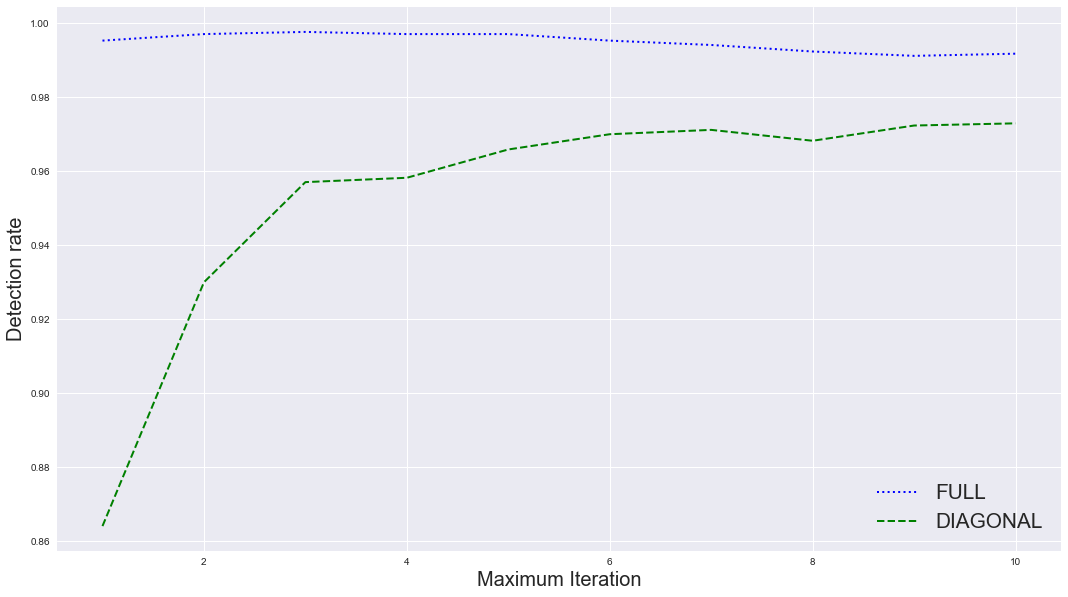

In [45]:
import matplotlib.pyplot as plt
x=[1,2,3,4,5,6,7,8,9,10]
y1=[0.995294 , 0.997058,0.997647 ,0.997058 ,\
    0.997058,0.995294 ,0.994117,0.992352,0.991176,0.991764]
y2=[0.864117,0.93 ,0.957058,0.958235,0.965882,0.97,0.971176,\
    0.968235,0.972352,0.972941]
plt.figure(figsize=(18,10))
plt.xlabel("Maximum Iteration",fontsize=20)
plt.ylabel("Detection rate",fontsize=20)
plt.plot(x,y1,'b:',label='FULL',linewidth=2)
plt.plot(x,y2,'g--',label='DIAGONAL',linewidth=2)
plt.legend(loc='lower right',fontsize='xx-large')
plt.show()